In [28]:
import numpy as np
from numpy import linalg as la
# import fcwt
# from scipy.integrate import simps
# from scipy.interpolate import CubicSpline
# from scipy.signal import savgol_filter, argrelmax, find_peaks_cwt, find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
import pandas as pd
# %matplotlib widget

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage{amssymb}\usepackage{amsmath}\usepackage{bm}\usepackage{physics}', # insert packages here e.g. r'\usepackage{mathrm}'
    "font.family": "serif",
    "font.serif": "cm",
    "font.size": 9, # 10 for normal figs, 13.5 for paper panel
    "legend.fontsize": 8 # 9 for normal figs, 11.5, for paper panel
})
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

textsize = 9

figwidth_latex_pt = 246.0
figwidth_2col_latex_pt = 246.0
inches_per_pt = 1.0/72.27
golden = (np.sqrt(5)-1.0)/2.0
figwidth = figwidth_latex_pt*inches_per_pt
figheight = figwidth*golden
figwidth_2col = figwidth_latex_pt*inches_per_pt
figheight_2col = figwidth_2col*golden
figsize = (figwidth, figheight)
figsize_mod = (figwidth, figheight*1.07)
figsize_2col = (figwidth_2col, figheight_2col)
figsize_map = (figwidth, figwidth)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [29]:
# Columns: train loss (mean, std),
#          test loss (mean, std),
#          train acc (mean, std),
#          test acc (mean, std)

file_root = '../data/forrelation/'

# Import files - quantum
data_qnn_n4_init = np.genfromtxt(file_root + 'lasso_regression_orig_basis_n=4_initial.csv', delimiter=',')
data_qnn_n4 = np.genfromtxt(file_root + 'lasso_regression_orig_basis_n=4.csv', delimiter=',')
data_qnn_n6_init = np.genfromtxt(file_root + 'lasso_regression_orig_basis_n=6_initial.csv', delimiter=',')
data_qnn_n6 = np.genfromtxt(file_root + 'lasso_regression_orig_basis_n=6.csv', delimiter=',')
data_qnn_n8 = np.genfromtxt(file_root + 'lasso_regression_orig_basis_n=8.csv', delimiter=',')
data_qnn_n10 = np.genfromtxt(file_root + 'lasso_regression_orig_basis_n=10.csv', delimiter=',')
data_qnn_n12 = np.genfromtxt(file_root + 'lasso_regression_orig_basis_n=12.csv', delimiter=',')

# Import files - quantum - changed basis
data_qnn_cb_n4 = np.genfromtxt(file_root + 'lasso_regression_n4.csv', delimiter=',')
data_qnn_cb_n6 = np.genfromtxt(file_root + 'lasso_regression_n6.csv', delimiter=',')
data_qnn_cb_n8 = np.genfromtxt(file_root + 'lasso_regression_n8.csv', delimiter=',')

# Import files - quantum parametrized unitary - only n=4
data_q_param_unitary_n4 = np.genfromtxt(file_root + 'forr_ovlap_model_n4_increase_setsize.csv', delimiter=',')

# Import files - classical NN
# data_nn_n4 = np.load(file_root + 'forr_siamese_nn_n4.npz')["results"]
# data_nn_n4 = np.load(file_root + 'forr_siamese_nn_n4_binarycrossentropy.npz')["results"]
data_nn_n4 = np.load(file_root + 'forr_siamese_nn_n4_cosine_bce_batch1.npz')["results"]
data_nn_n6 = np.load(file_root + 'forr_siamese_nn_n6.npz')["results"]
# data_nn_n6 = np.load(file_root + 'forr_siamese_nn_n6_binarycrossentropy.npz')["results"]
data_nn_n8 = np.load(file_root + 'forr_siamese_nn_n8.npz')["results"]
# data_nn_n8 = np.load(file_root + 'forr_siamese_nn_n8_binarycrossentropy.npz')["results"]
data_nn_n10 = np.load(file_root + 'forr_siamese_nn_n10.npz')["results"]
data_dnn_n10 = np.load(file_root + 'forr_siamese_dnn_n10.npz')["results"]

# Import files - classical NN - dropout
data_nn_drop_n4 = np.load(file_root + 'forr_siamese_nn_drop_n4.npz')["results"]
data_nn_drop_n6 = np.load(file_root + 'forr_siamese_nn_drop_n6.npz')["results"]
data_nn_drop_n8 = np.load(file_root + 'forr_siamese_nn_drop_n8.npz')["results"]
# data_nn_drop_n10 = np.load(file_root + 'forr_siamese_nn_drop_n10.npz')["results"]
# data_nn_drop_n10 = np.load(file_root + 'forr_siamese_nn_drop_n10_probability02.npz')["results"]
# data_nn_drop_n10 = np.load(file_root + 'forr_siamese_nn_drop_n10_probability005.npz')["results"]
data_nn_drop_n10 = np.load(file_root + 'forr_siamese_nn_drop_n10_probability001.npz')["results"]

# Import files - classical NN - changed basis
data_nn_cb_n4 = np.load(file_root + 'forr_siamese_nn_cb_n4.npz')["results"] 
data_nn_cb_n6 = np.load(file_root + 'forr_siamese_nn_cb_n6.npz')["results"] 
data_nn_cb_n8 = np.load(file_root + 'forr_siamese_nn_cb_n8.npz')["results"] 

# Import files - classical NN - changed basis - dropout
data_nn_cb_drop_n4 = np.load(file_root + 'forr_siamese_nn_cb_drop_n4.npz')["results"] 
data_nn_cb_drop_n6 = np.load(file_root + 'forr_siamese_nn_cb_drop_n6.npz')["results"] 
data_nn_cb_drop_n8 = np.load(file_root + 'forr_siamese_nn_cb_drop_n8.npz')["results"] 

# Import files - classical CNN
data_cnn_n4 = np.load(file_root + 'forr_siamese_cnn_n4.npz')["results"]
data_cnn_n6 = np.load(file_root + 'forr_siamese_cnn_n6.npz')["results"]
data_cnn_n8 = np.load(file_root + 'forr_siamese_cnn_n8.npz')["results"]
data_cnn_n10 = np.load(file_root + 'forr_siamese_cnn_n10.npz')["results"]
data_cnn_n12 = np.load(file_root + 'forr_siamese_cnn_n12.npz')["results"]

# Import files - classical CNN - dropout
data_cnn_drop_n4 = np.load(file_root + 'forr_siamese_cnn_drop_n4.npz')["results"]
data_cnn_drop_n6 = np.load(file_root + 'forr_siamese_cnn_drop_n6.npz')["results"]
data_cnn_drop_n8 = np.load(file_root + 'forr_siamese_cnn_drop_n8.npz')["results"]
data_cnn_drop_n10 = np.load(file_root + 'forr_siamese_cnn_drop_n10.npz')["results"]
data_cnn_drop_n12 = np.load(file_root + 'forr_siamese_cnn_drop_n12.npz')["results"]

# col1 = '#1A839E'
# col2 = '#FF9000'
# col3 = '#6A994E'
# col4 = '#3A2E39'
# col5 = '#7B3E19'

col1 = 'C0' # '#1A839E'
col2 = 'C1' # '#FF9000'
col3 = 'C2' # '#6A994E'
col4 = 'C3' # '#3A2E39'
col5 = 'C4' # '#7B3E19'

cols = [col1, col2, col3, col4, col5]

#### Figure 3 - unitary V measurement

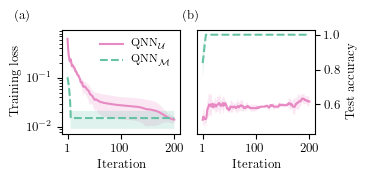

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(figwidth*1.1, figheight*0.8))

##################################
##################################

custom_labels = ['$\\text{QNN}_\\mathcal{U}$', '$\\text{QNN}_\\mathcal{M}$']  # Custom legend labels
markers = ['s', '^', 'o', 'v', 'd', 'p', 'P', '*', 'X', 'h']

xx = [i for i in range(0, 201)]

data = pd.read_csv('../data/forr_vqc_model_local_n=4_av_loss_v2.csv', header=None).values
data_error_upper = data[:, 1]
ax[0].plot(xx, data[:, 0], color=cols[3], alpha=1)
ax[0].fill_between(xx, data[:, 0] - data[:, 1], data[:, 0] + data_error_upper, color=cols[3], alpha=0.2, edgecolor='none', label='_nolegend_')

n_repeat = 7
data = [data_qnn_n4_init[9, 0]]
step = (data_qnn_n4[9, 0] - data_qnn_n4_init[9, 0]) / (n_repeat-1)
for i in range(n_repeat-1):
    data = np.concatenate((data, [data_qnn_n4_init[9, 0] + (i+1)*step]))
data = np.concatenate((data, np.repeat(data_qnn_n4[9, 0], 201-n_repeat)))
data_error_upper = [data_qnn_n4_init[9, 1]]
step = (data_qnn_n4[9, 1] - data_qnn_n4_init[9, 1]) / (n_repeat-1)
for i in range(n_repeat-1):
    data_error_upper = np.concatenate((data_error_upper, [data_qnn_n4_init[9, 1] + (i+1)*step]))
data_error_upper = np.concatenate((data_error_upper, np.repeat(data_qnn_n4[9, 1], 201-n_repeat)))
# n_repeat = 7
# data = np.concatenate((np.repeat(data_qnn_n4_init[9, 0], n_repeat), np.repeat(data_qnn_n4[9, 0], 201-n_repeat)))
# data_error_upper = np.concatenate((np.repeat(data_qnn_n4_init[9, 1], n_repeat), np.repeat(data_qnn_n4[9, 1], 201-n_repeat)))
ax[0].plot(xx, data, color=cols[0], alpha=1, ls='--')
ax[0].fill_between(xx, data - data_error_upper, data + data_error_upper, color=cols[0], alpha=0.2, edgecolor='none', label='_nolegend_')

ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Training loss')
ax[0].set_yscale('log')

##################################
##################################

data = pd.read_csv('../data/forr_vqc_model_local_n=4_av_test_accuracy_v2.csv', header=None).values
data_error_upper = np.minimum(data[:, 1], 1 - data[:, 0])
ax[1].plot(xx, data[:, 0], color=cols[3], alpha=1)
ax[1].fill_between(xx, data[:, 0] - data[:, 1], data[:, 0] + data_error_upper, color=cols[3], alpha=0.2, edgecolor='none', label='_nolegend_')

n_repeat = 7
data = [data_qnn_n4_init[9, 6]]
step = (data_qnn_n4[9, 6] - data_qnn_n4_init[9, 6]) / (n_repeat-1)
for i in range(n_repeat-1):
    data = np.concatenate((data, [data_qnn_n4_init[9, 6] + (i+1)*step]))
data = np.concatenate((data, np.repeat(data_qnn_n4[9, 6], 201-n_repeat)))
data_error_upper = [data_qnn_n4_init[9, 7]]
step = (data_qnn_n4[9, 7] - data_qnn_n4_init[9, 7]) / (n_repeat-1)
for i in range(n_repeat-1):
    data_error_upper = np.concatenate((data_error_upper, [data_qnn_n4_init[9, 7] + (i+1)*step]))
data_error_upper = np.concatenate((data_error_upper, np.repeat(data_qnn_n4[9, 7], 201-n_repeat)))
ax[1].plot(xx, data, color=cols[0], alpha=1, ls='--')
ax[1].fill_between(xx, data - data_error_upper, data + data_error_upper, color=cols[0], alpha=0.2, edgecolor='none', label='_nolegend_')
# data = data_qnn_n4_init[9, 6]
# data_error_upper = data_qnn_n4_init[9, 7]
# ax[1].hlines(data, 0, 200, color=cols[0], alpha=1, ls='--')
# ax[1].fill_between(xx, np.repeat(data, 201) - np.repeat(data_error_upper, 201), np.repeat(data, 201) + np.repeat(data_error_upper, 201), color=cols[0], alpha=0.2, edgecolor='none', label='_nolegend_')

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Test accuracy')
# ax[1].set_ylim([0.5, 1])

ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Test accuracy')

##################################
##################################
plt.tight_layout()

# ax[1].legend(loc='center left', bbox_to_anchor=(-0.5, 0.5))
ax[0].legend(custom_labels, bbox_to_anchor=(0.24, 0.55), frameon=False)
# fig.text(0.5, 0.02, 'Iteration', ha='center', va='center')
fig.text(0.07, 1, '(a)', ha='center', va='center')
fig.text(0.52, 1, '(b)', ha='center', va='center')
for axis in ax:
    axis.set_xticks([1, 100, 200])
    axis.set_xticklabels(['1', '100', '200'])

plt.tight_layout()

plt.savefig(f'../data/figure_3.pdf', bbox_inches='tight', pad_inches=0.05)


#### Figure 4 - classical V quantum

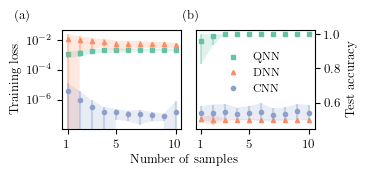

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(figwidth*1.1, figheight*0.7))

##################################
##################################

to_plot = ['qnn', 'dnn', 'cnn']
custom_labels = ['QNN', 'DNN', 'CNN']  # Custom legend labels
markers = ['s', '^', 'o', 'v', 'd', 'p', 'P', '*', 'X', 'h']

idx = 0
n = 10

xx = [i for i in range(1, 11)]

data = []
for name in to_plot:
    data.append(globals()[f'data_{name}_n{n}'])

data_error_upper = []
for i in range(len(to_plot)):
    if idx==4 or idx==6:
        data_error_upper.append(np.minimum(data[i][:, idx+1], 1 - data[i][:, idx]))
    else:
        data_error_upper.append(data[i][:, idx+1])

markers = ['s', '^', 'o', 'v', 'd', 'p', 'P', '*', 'X', 'h']
for i in range(len(to_plot)):
    ax[0].errorbar(xx, data[i][:, idx], yerr=[data[i][:, idx+1], data_error_upper[i]], fmt='none', elinewidth=1.5, ecolor=cols[i], alpha=0.4)
    ax[0].plot(xx, data[i][:, idx], markers[i], markersize=3, markerfacecolor=cols[i], markeredgecolor=cols[i], alpha=1, label=f'{to_plot[i]}'.upper())
    ax[0].fill_between(xx, data[i][:, idx] - data[i][:, idx+1], data[i][:, idx] + data_error_upper[i], color=cols[i], alpha=0.2, edgecolor='none', label='_nolegend_')

# ax[0].set_xlabel('Number of samples')
match idx:
    case 0:
        ax[0].set_ylabel('Training loss')
    case 2:
        ax[0].set_ylabel('Test loss')
    case 4:
        ax[0].set_ylabel('Training accuracy')
    case 6:
        ax[0].set_ylabel('Test accuracy')
# ax[0].legend()
# ax[0].legend(loc='lower center')
if idx == 0 or idx == 2:
    ax[0].set_yscale('log')

##################################
##################################

# to_plot = ['qnn', 'q_param_unitary']
idx = 6
# n = 10

xx = [i for i in range(1, 11)]

data = []
for name in to_plot:
    data.append(globals()[f'data_{name}_n{n}'])

data_error_upper = []
for i in range(len(to_plot)):
    if idx==4 or idx==6:
        data_error_upper.append(np.minimum(data[i][:, idx+1], 1 - data[i][:, idx]))
    else:
        data_error_upper.append(data[i][:, idx+1])

for i in range(len(to_plot)):
    ax[1].errorbar(xx, data[i][:, idx], yerr=[data[i][:, idx+1], data_error_upper[i]], fmt='none', elinewidth=1.5, ecolor=cols[i], alpha=0.4)
    ax[1].plot(xx, data[i][:, idx], markers[i], markersize=3, markerfacecolor=cols[i], markeredgecolor=cols[i], alpha=1, label=f'{to_plot[i]}'.upper())
    ax[1].fill_between(xx, data[i][:, idx] - data[i][:, idx+1], data[i][:, idx] + data_error_upper[i], color=cols[i], alpha=0.2, edgecolor='none', label='_nolegend_')

# ax[1].set_xlabel('Number of samples')
# ax[1].tick_params(labelleft=False)
if idx == 0 or idx == 2:
    ax[1].set_yscale('log')
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
match idx:
    case 0:
        ax[1].set_ylabel('Training loss')
    case 2:
        ax[1].set_ylabel('Test loss')
    case 4:
        ax[1].set_ylabel('Training accuracy')
    case 6:
        ax[1].set_ylabel('Test accuracy')
# ax[1].legend()
# ax[1].legend(loc='lower center')
if idx == 0 or idx == 2:
    ax[1].set_yscale('log')

##################################
##################################
plt.tight_layout()

# ax[1].legend(loc='center left', bbox_to_anchor=(-0.5, 0.5))
ax[1].legend(custom_labels, loc='center left', bbox_to_anchor=(0.14, 0.56), frameon=False)
fig.text(0.5, 0.02, 'Number of samples', ha='center', va='center')
fig.text(0.07, 1, '(a)', ha='center', va='center')
fig.text(0.52, 1, '(b)', ha='center', va='center')
for axis in ax:
    axis.set_xticks([1, 5, 10])
    axis.set_xticklabels(['1', '5', '10'])

plt.tight_layout()

# plt.savefig(f'../data/figure_4.pdf', bbox_inches='tight', pad_inches=0.05)


#### Figure 5 - classical V quantum (wrt number of qubits)

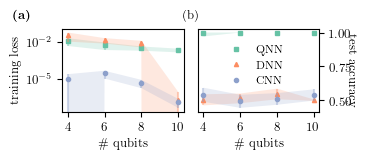

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(figwidth*1.1, figheight*0.7))

##################################
##################################

to_plot = ['qnn', 'nn', 'cnn']
custom_labels = ['QNN', 'DNN', 'CNN']  # Custom legend labels
markers = ['s', '^', 'o', 'v', 'd', 'p', 'P', '*', 'X', 'h']

idx = 0
n_samples = 5

xx = [4, 6, 8, 10]

data = np.zeros((len(to_plot), len(xx), 2))
for (ii, n) in enumerate(xx):
    tmp_data = []
    for name in to_plot:
        tmp_data.append(globals()[f'data_{name}_n{n}'])
    for i in range(len(to_plot)):
        data[i, ii, 0] = tmp_data[i][n_samples-1, idx]
        data[i, ii, 1] = tmp_data[i][n_samples-1, idx+1]

data_error_upper = []
for i in range(len(to_plot)):
    if idx==4 or idx==6:
        data_error_upper.append(np.minimum(data[i, :, 1], 1 - data[i, :, 0]))
    else:
        data_error_upper.append(data[i, :, 1])

markers = ['s', '^', 'o', 'v', 'd', 'p', 'P', '*', 'X', 'h']
for i in range(len(to_plot)):
    ax[0].errorbar(xx, data[i][:, 0], yerr=[data[i][:, 1], data_error_upper[i]], fmt='none', elinewidth=1.5, ecolor=cols[i], alpha=0.4)
    ax[0].plot(xx, data[i][:, 0], markers[i], markersize=3, markerfacecolor=cols[i], markeredgecolor=cols[i], alpha=1, label=f'{to_plot[i]}'.upper())
    ax[0].fill_between(xx, data[i][:, 0] - data[i][:, 1], data[i][:, 0] + data_error_upper[i], color=cols[i], alpha=0.2, edgecolor='none', label='_nolegend_')

# ax[0].set_xlabel('Number of samples')
match idx:
    case 0:
        ax[0].set_ylabel('training loss')
    case 2:
        ax[0].set_ylabel('test loss')
    case 4:
        ax[0].set_ylabel('training accuracy')
    case 6:
        ax[0].set_ylabel('test accuracy')
# ax[0].legend()
# ax[0].legend(loc='lower center')
if idx == 0 or idx == 2:
    ax[0].set_yscale('log')

##################################
##################################

idx = 6

data = np.zeros((len(to_plot), len(xx), 2))
for (ii, n) in enumerate(xx):
    tmp_data = []
    for name in to_plot:
        tmp_data.append(globals()[f'data_{name}_n{n}'])
    for i in range(len(to_plot)):
        data[i, ii, 0] = tmp_data[i][n_samples-1, idx]
        data[i, ii, 1] = tmp_data[i][n_samples-1, idx+1]

data_error_upper = []
for i in range(len(to_plot)):
    if idx==4 or idx==6:
        data_error_upper.append(np.minimum(data[i, :, 1], 1 - data[i, :, 0]))
    else:
        data_error_upper.append(data[i, :, 1])

for i in range(len(to_plot)):
    ax[1].errorbar(xx, data[i][:, 0], yerr=[data[i][:, 1], data_error_upper[i]], fmt='none', elinewidth=1.5, ecolor=cols[i], alpha=0.4)
    ax[1].plot(xx, data[i][:, 0], markers[i], markersize=3, markerfacecolor=cols[i], markeredgecolor=cols[i], alpha=1, label=f'{to_plot[i]}'.upper())
    ax[1].fill_between(xx, data[i][:, 0] - data[i][:, 1], data[i][:, 0] + data_error_upper[i], color=cols[i], alpha=0.2, edgecolor='none', label='_nolegend_')

# ax[1].set_xlabel('Number of samples')
# ax[1].tick_params(labelleft=False)
if idx == 0 or idx == 2:
    ax[1].set_yscale('log')
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
match idx:
    case 0:
        ax[1].set_ylabel('training loss', rotation=180)
    case 2:
        ax[1].set_ylabel('test loss')
    case 4:
        ax[1].set_ylabel('training accuracy')
    case 6:
        ax[1].set_ylabel('test accuracy', rotation=-90)
# ax[1].legend()
# ax[1].legend(loc='lower center')
if idx == 0 or idx == 2:
    ax[1].set_yscale('log')

##################################
##################################
plt.tight_layout()

# ax[1].legend(loc='center left', bbox_to_anchor=(-0.5, 0.5))
ax[1].legend(custom_labels, loc='center left', bbox_to_anchor=(0.14, 0.56), frameon=False)
# fig.text(0.5, 0.02, 'Number of qubits', ha='center', va='center')
fig.text(0.07, 1, '\\textbf{(a)}', ha='center', va='center')
fig.text(0.52, 1, '(b)', ha='center', va='center')
for axis in ax:
    axis.set_xticks([4, 6, 8, 10])
    axis.set_xticklabels(['4', '6', '8', '10'])
    axis.set_xlabel('\\# qubits')

plt.tight_layout()

plt.savefig(f'../data/figure_5.pdf', bbox_inches='tight', pad_inches=0.05)

#### Plotting functions

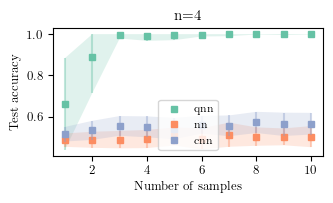

In [34]:
# Columns: train loss (mean, std), 0, 1
#          test loss (mean, std), 2, 3
#          train acc (mean, std), 4, 5
#          test acc (mean, std) 6, 7

def plot_data(names, n, idx):
    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    xx = [i for i in range(1, 11)]

    data = []
    for name in names:
        data.append(globals()[f'data_{name}_n{n}'])

    data_error_upper = []
    for i in range(len(names)):
        if idx==4 or idx==6:
            data_error_upper.append(np.minimum(data[i][:, idx+1], 1 - data[i][:, idx]))
        else:
            data_error_upper.append(data[i][:, idx+1])

    for i in range(len(names)):
        ax.errorbar(xx, data[i][:, idx], yerr=[data[i][:, idx+1], data_error_upper[i]], fmt='none', elinewidth=1.5, ecolor=cols[i], alpha=0.4)
        ax.plot(xx, data[i][:, idx], 's', markersize=5, markerfacecolor=cols[i], markeredgecolor=cols[i], alpha=1, label=f'{names[i]}')

        ax.fill_between(xx, data[i][:, idx] - data[i][:, idx+1], data[i][:, idx] + data_error_upper[i], color=cols[i], alpha=0.2, edgecolor='none')

    ax.set_xlabel('Number of samples')
    match idx:
        case 0:
            ax.set_ylabel('Train loss')
        case 2:
            ax.set_ylabel('Test loss')
        case 4:
            ax.set_ylabel('Train accuracy')
        case 6:
            ax.set_ylabel('Test accuracy')

    ax.set_title(f'n={n}')
    ax.legend()
    ax.legend(loc='lower center')

    if idx == 0 or idx == 2:
        ax.set_yscale('log')

    plt.tight_layout()

    # match idx:
    #     case 0:
    #         plt.savefig(f'../data/paper_trainlossVSsamples_n{n}.pdf')
    #     case 2:
    #         plt.savefig(f'../data/paper_testlossVSsamples_n{n}.pdf')
    #     case 4:
    #         plt.savefig(f'../data/paper_trainaccVSsamples_n{n}.pdf')
    #     case 6:
    #         plt.savefig(f'../data/paper_testaccVSsamples_n{n}.pdf')

# Call the function with the desired string
plot_data(['qnn', 'nn', 'cnn'], '4', 6)

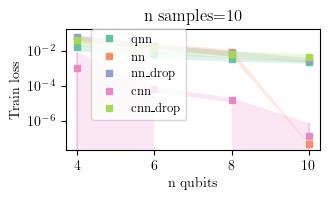

In [ ]:
# Columns: train loss (mean, std), 0, 1
#          test loss (mean, std), 2, 3
#          train acc (mean, std), 4, 5
#          test acc (mean, std) 6, 7

def plot_data(names, n_vec, n_samples, idx):
    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    xx = n_vec

    data = np.zeros((len(names), len(n_vec), 2))
    for (ii, n) in enumerate(n_vec):
        tmp_data = []
        for name in names:
            tmp_data.append(globals()[f'data_{name}_n{n}'])
        for i in range(len(names)):
            data[i, ii, 0] = tmp_data[i][n_samples-1, idx]
            data[i, ii, 1] = tmp_data[i][n_samples-1, idx+1]
    
    data_error_upper = []
    for i in range(len(names)):
        if idx==4 or idx==6:
            data_error_upper.append(np.minimum(data[i, :, 1], 1 - data[i, :, 0]))
        else:
            data_error_upper.append(data[i, :, 1])

    for i in range(len(names)):
        ax.errorbar(xx, data[i, :, 0], yerr=[data[i, :, 1], data_error_upper[i]], fmt='none', elinewidth=1.5, ecolor=cols[i], alpha=0.4)
        ax.plot(xx, data[i, :, 0], 's', markersize=5, markerfacecolor=cols[i], markeredgecolor=cols[i], alpha=1, label=f'{names[i]}')

        ax.fill_between(xx, data[i, :, 0] - data[i, :, 1], data[i, :, 0] + data_error_upper[i], color=cols[i], alpha=0.2, edgecolor='none')

    ax.set_xlabel('n qubits')
    match idx:
        case 0:
            ax.set_ylabel('Train loss')
        case 2:
            ax.set_ylabel('Test loss')
        case 4:
            ax.set_ylabel('Train accuracy')
        case 6:
            ax.set_ylabel('Test accuracy')

    ax.set_title(f'n samples={n_samples}')
    # ax.legend(fontsize='small', loc='center', frameon=False)
    # ax.legend(loc='center')
    ax.legend(loc=[0.1, 0.25])

    if idx == 0 or idx == 2:
        ax.set_yscale('log')

    plt.tight_layout()

    # match idx:
    #     case 0:
    #         plt.savefig(f'../data/paper_trainlossVSn_nsamples{n_samples}.pdf')
    #     case 2:
    #         plt.savefig(f'../data/paper_testlossVSn_nsamples{n_samples}.pdf')
    #     case 4:
    #         plt.savefig(f'../data/paper_trainaccVSn_nsamples{n_samples}.pdf')
    #     case 6:
    #         plt.savefig(f'../data/paper_testaccVSn_nsamples{n_samples}.pdf')

# Call the function with the desired string
plot_data(['qnn', 'nn', 'nn_drop', 'cnn', 'cnn_drop'], [4, 6, 8, 10], 10, 0)

#### Old cells

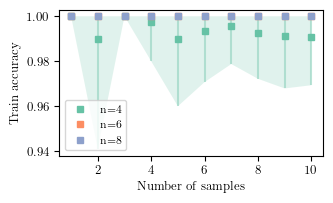

In [ ]:
# Columns: train loss (mean, std), 0, 1
#          test loss (mean, std), 2, 3
#          train acc (mean, std), 4, 5
#          test acc (mean, std) 6, 7

def plot_data_type(what, idx):
    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    xx = [i for i in range(1, 11)]

    # Select the data based on the input string
    data_n4 = globals()[f'data_n4{what}']
    data_n6 = globals()[f'data_n6{what}']
    data_n8 = globals()[f'data_n8{what}']

    # Calculate the upper errors
    if idx==4 or idx==6:
        upper_data_n4_error = np.minimum(data_n4[:, idx+1], 1 - data_n4[:, idx])
        upper_data_n6_error = np.minimum(data_n6[:, idx+1], 1 - data_n6[:, idx])
        upper_data_n8_error = np.minimum(data_n8[:, idx+1], 1 - data_n8[:, idx])
    else:
        upper_data_n4_error = data_n4[:, idx+1]
        upper_data_n6_error = data_n6[:, idx+1]
        upper_data_n8_error = data_n8[:, idx+1]

    # Plot error bars
    ax.errorbar(xx, data_n4[:, idx], yerr=[data_n4[:, idx+1], upper_data_n4_error], fmt='none', elinewidth=1.5, ecolor=col1, alpha=0.4)
    ax.errorbar(xx, data_n6[:, idx], yerr=[data_n6[:, idx+1], upper_data_n6_error], fmt='none', elinewidth=1.5, ecolor=col2, alpha=0.4)
    ax.errorbar(xx, data_n8[:, idx], yerr=[data_n8[:, idx+1], upper_data_n8_error], fmt='none', elinewidth=1.5, ecolor=col3, alpha=0.4)

    # Plot markers
    ax.plot(xx, data_n4[:, idx], 's', markersize=5, markerfacecolor=col1, markeredgecolor=col1, alpha=1, label=f'n=4')
    ax.plot(xx, data_n6[:, idx], 's', markersize=5, markerfacecolor=col2, markeredgecolor=col2, alpha=1, label=f'n=6')
    ax.plot(xx, data_n8[:, idx], 's', markersize=5, markerfacecolor=col3, markeredgecolor=col3, alpha=1, label=f'n=8')

    # Fill between
    ax.fill_between(xx, data_n4[:, idx] - data_n4[:, idx+1], data_n4[:, idx] + upper_data_n4_error, color=col1, alpha=0.2, edgecolor='none')
    ax.fill_between(xx, data_n6[:, idx] - data_n6[:, idx+1], data_n6[:, idx] + upper_data_n6_error, color=col2, alpha=0.2, edgecolor='none')
    ax.fill_between(xx, data_n8[:, idx] - data_n8[:, idx+1], data_n8[:, idx] + upper_data_n8_error, color=col3, alpha=0.2, edgecolor='none')

    ax.set_xlabel('Number of samples')
    match idx:
        case 0:
            ax.set_ylabel('Train loss')
        case 2:
            ax.set_ylabel('Test loss')
        case 4:
            ax.set_ylabel('Train accuracy')
        case 6:
            ax.set_ylabel('Test accuracy')

    ax.legend()
    # ax.legend(loc='lower right')

    if idx == 0 or idx == 2:
        ax.set_yscale('log')
        # ax.set_ylim(1e-15, 1)

    plt.tight_layout()

    match idx:
        case 0:
            plt.savefig(f'../data/paper_trainlossVSsamples_{what}.pdf')
        case 2:
            plt.savefig(f'../data/paper_testlossVSsamples_{what}.pdf')
        case 4:
            plt.savefig(f'../data/paper_trainaccVSsamples_{what}.pdf')
        case 6:
            plt.savefig(f'../data/paper_testaccVSsamples_{what}.pdf')

# Call the function with the desired string
plot_data_type('cl_dropout', 4)